<h1>CAPSTONE_PROJECT- <b><em>BattleOfNeighborhood</em></b></h1>

In this Capstone project we'll try to explore 60 Indian cities and cluster them in five groups based on their neighborhoods.  

<h2>Import libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import requests
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim  

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0

In [3]:
from sklearn.cluster import KMeans

<h2>Data Preparation</h2>
We will first prepare a list of cities and then find coordinates of these cities.

In [4]:
data=['New Delhi','Mumbai','Banglore','Kolkata','Chennai','Bhopal','Indore','Pune','Hyderabad','Ahmedabad',
     'Vadodara','Jaipur','Lucknow','Visakhapatnam','Nagpur','Raipur','Ranchi','Kanpur','Patna','Varanasi','Allahabad',
     'Chandigarh','Amritsar','Bhubaneshwar','Guwahati','Thiruvananthapuram','Dehradun','Lucknow','Ludhiana','Vijayawada',
     'Kochi','Thrissur', 'Kozhikode','Malappuram' ,'Kollam' ,'Kannur','Nashik','Aurangabad','Coimbatore','Gurgoan', 'Faridabad ',
     'Ghaziabad','Noida','Puducherry','Gandhinagar','Visakhapatnam','Rajkot','Gangtok','Mysore','Warangal','Jamshedpur',
     'Tiruchirappalli','Trivandrum','Udaipur','Madurai',' Mangalore','Jodhpur','Siliguri','Darjeeling','Port Blair']

In [5]:
df=pd.DataFrame(data,columns=['City'])

In [6]:
print(df.shape)
df.head()

(60, 1)


,City
0,New Delhi
1,Mumbai
2,Banglore
3,Kolkata
4,Chennai


As we are done with preparing the list of cities so now let's define a function that will find the <b>latitude</b> and <b>longitude</b> for all our cities and then we will store them in our dataframe <b>df</b>.

In [7]:
l1=[]
l2=[]

In [8]:
def findcoordinate(cityname):
    for city in cityname:
        geolocator = Nominatim(user_agent="explorer")
        location = geolocator.geocode(city)
        l1.append(location.latitude)
        l2.append(location.longitude)
        #print(city,location.latitude,location.longitude)
        
        

In [9]:
findcoordinate(df.City)

In [10]:
df['Latitude']=l1
df['Longitude']=l2

In [11]:
df.tail()

,City,Latitude,Longitude
55,Mangalore,12.869810,74.843008
56,Jodhpur,26.296772,73.035143
57,Siliguri,26.716413,88.430992
58,Darjeeling,27.038372,88.261754
59,Port Blair,11.664535,92.739045


Now we will plot all the cities on map using folium library. Before that we need to find coordinates of India using geolocator module.

In [12]:

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode("India")
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of India are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of India are 22.3511148, 78.6677428.


In [13]:
map = folium.Map(location=[latitude, longitude], zoom_start=5)

# add markers to map
for lat, lng, city in zip(df['Latitude'], df['Longitude'], df['City']):
    label = folium.Popup(city, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=city,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

<h2>Exploring the Neighborhood of Cities</h2>
Let's explore the neighborhood of each cities using Four Square API. We will set our limit to 50 and radius to 150kms.

In [14]:
CLIENT_ID = 'KT041LGZIHDSIQAHBY5MCJW0SADKWYEBVSVXKT3QD1YX43RX' # your Foursquare ID
CLIENT_SECRET = 'QXE4WCDW13XVOPAWY5UV3DKWMZGVOTZA0JKX5S5KJWJ1M1N3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KT041LGZIHDSIQAHBY5MCJW0SADKWYEBVSVXKT3QD1YX43RX
CLIENT_SECRET:QXE4WCDW13XVOPAWY5UV3DKWMZGVOTZA0JKX5S5KJWJ1M1N3


In [15]:
LIMIT = 50# limit of number of venues returned by Foursquare API
radius=150

Here's a function that will fetch and display all the relevant details that is required for clustering and analysis.

In [16]:
def getNearbyVenues(names, latitudes, longitudes):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
         # make the GET request
        results = requests.get(url).json()
        results=results["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])  
    nearby_venues.columns = ['City', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [17]:
venues = getNearbyVenues(names=df['City'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )


In [18]:
print(venues.shape)
venues


(79, 7)


,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,New Delhi,28.613895,77.209006,Hauz Khas Social,28.613939,77.209021,Music Venue
1,New Delhi,28.613895,77.209006,Delhi Airport Metro Express,28.613940,77.209020,Light Rail Station
2,New Delhi,28.613895,77.209006,New Delhi India,28.613940,77.209020,Indian Restaurant
3,New Delhi,28.613895,77.209006,Lodi Gardens,28.613940,77.209020,National Park
4,Mumbai,18.938771,72.835335,Chhatrapati Shivaji Maharaj Terminus,18.940088,72.835257,Train Station
...,...,...,...,...,...,...,...
74,Mangalore,12.869810,74.843008,Sapna Book Store,12.869741,74.841777,Bookstore
75,Mangalore,12.869810,74.843008,Punjabi Dhaba,12.870765,74.842103,Punjabi Restaurant
76,Mangalore,12.869810,74.843008,Reliance Timeout,12.870966,74.842472,Bookstore
77,Darjeeling,27.038372,88.261754,Darjeeling Railway Station,27.038171,88.263214,Train Station


In [19]:
venues.groupby('City').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Mangalore,5,5,5,5,5,5
Ahmedabad,3,3,3,3,3,3
Allahabad,1,1,1,1,1,1
Amritsar,3,3,3,3,3,3
Banglore,1,1,1,1,1,1
Bhopal,2,2,2,2,2,2
Bhubaneshwar,1,1,1,1,1,1
Coimbatore,1,1,1,1,1,1
Darjeeling,1,1,1,1,1,1


In [20]:
# one hot encoding
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['City'] = venues['City'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head()

,Vegetarian / Vegan Restaurant,Accessories Store,Airport,Asian Restaurant,Bakery,Bookstore,Buffet,Bus Station,Business Service,Café,...,Punjabi Restaurant,Restaurant,River,Sandwich Place,Seafood Restaurant,Shipping Store,South Indian Restaurant,Supplement Shop,Tourist Information Center,Train Station
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
onehot.shape

(79, 50)

In [22]:
grouped = onehot.groupby('City').mean().reset_index()
grouped

,City,Vegetarian / Vegan Restaurant,Accessories Store,Airport,Asian Restaurant,Bakery,Bookstore,Buffet,Bus Station,Business Service,...,Punjabi Restaurant,Restaurant,River,Sandwich Place,Seafood Restaurant,Shipping Store,South Indian Restaurant,Supplement Shop,Tourist Information Center,Train Station
0,Mangalore,0.000000,0.000000,0.00,0.000000,0.00,0.4,0.0,0.00,0.000000,...,0.2,0.00,0.000000,0.00,0.2,0.000000,0.0,0.0,0.0,0.000000
1,Ahmedabad,0.000000,0.000000,0.00,0.000000,0.00,0.0,0.0,0.00,0.333333,...,0.0,0.00,0.333333,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000
2,Allahabad,0.000000,0.000000,0.00,0.000000,0.00,0.0,0.0,0.00,0.000000,...,0.0,0.00,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000
3,Amritsar,0.000000,0.000000,0.00,0.000000,0.00,0.0,0.0,0.00,0.000000,...,0.0,0.00,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000
4,Banglore,0.000000,0.000000,0.00,0.000000,0.00,0.0,0.0,0.00,0.000000,...,0.0,0.00,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000
5,Bhopal,0.000000,0.000000,0.00,0.000000,0.00,0.0,0.0,0.00,0.000000,...,0.0,0.00,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000
6,Bhubaneshwar,0.000000,0.000000,0.00,0.000000,0.00,0.0,0.0,0.00,0.000000,...,0.0,0.00,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000
7,Coimbatore,0.000000,0.000000,0.00,0.000000,0.00,0.0,0.0,0.00,0.000000,...,0.0,0.00,0.000000,0.00,0.0,0.000000,1.0,0.0,0.0,0.000000
8,Darjeeling,0.000000,0.000000,0.00,0.000000,0.00,0.0,0.0,0.00,0.000000,...,0.0,0.00,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,1.000000
9,Dehradun,0.000000,0.000000,0.00,0.000000,0.00,0.0,0.0,0.00,0.000000,...,0.0,0.00,0.000000,0.25,0.0,0.000000,0.0,0.0,0.0,0.000000


Above we have performed onehot encoding and then we tried to find frequency of occuring of all the places based on their category.
Now Let's find the top 25 most frequent places around the cities.

In [23]:
num_top_venues = 25

for hood in grouped['City']:
    print("----"+hood+"----")
    temp = grouped[grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Mangalore----
                            venue  freq
0                       Bookstore   0.4
1              Punjabi Restaurant   0.2
2              Seafood Restaurant   0.2
3                    Camera Store   0.2
4                     Pizza Place   0.0
5                   Jewelry Store   0.0
6              Light Rail Station   0.0
7                          Market   0.0
8                       Multiplex   0.0
9                     Music Venue   0.0
10                  National Park   0.0
11                      Nightclub   0.0
12                         Palace   0.0
13                           Park   0.0
14  Vegetarian / Vegan Restaurant   0.0
15                          Plaza   0.0
16            Indie Movie Theater   0.0
17                     Restaurant   0.0
18                          River   0.0
19                 Sandwich Place   0.0
20                 Shipping Store   0.0
21        South Indian Restaurant   0.0
22                Supplement Shop   0.0
23     Tourist Inform

In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
num_top_venues = 25

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['City'] = grouped['City']

for ind in np.arange(grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue
0,Mangalore,Bookstore,Seafood Restaurant,Punjabi Restaurant,Camera Store,Train Station,Department Store,Fried Chicken Joint,Food Court,Food,...,Currency Exchange,Hotel,Business Service,Bus Station,Buffet,Bakery,Asian Restaurant,Airport,Accessories Store,Furniture / Home Store
1,Ahmedabad,Park,River,Business Service,Currency Exchange,Fried Chicken Joint,Food Court,Food,Flea Market,Fast Food Restaurant,...,Hotel,Café,Bus Station,Buffet,Bookstore,Bakery,Asian Restaurant,Airport,Accessories Store,Furniture / Home Store
2,Allahabad,Furniture / Home Store,Train Station,Hotel Bar,Fried Chicken Joint,Food Court,Food,Flea Market,Fast Food Restaurant,Event Service,...,Business Service,Bus Station,Buffet,Bookstore,Bakery,Asian Restaurant,Airport,Accessories Store,Hotel,IT Services
3,Amritsar,Hotel,Pizza Place,Currency Exchange,Furniture / Home Store,Fried Chicken Joint,Food Court,Food,Flea Market,Fast Food Restaurant,...,Café,Business Service,Bus Station,Buffet,Bookstore,Bakery,Asian Restaurant,Airport,Accessories Store,Camera Store
4,Banglore,Indian Restaurant,Train Station,Department Store,Furniture / Home Store,Fried Chicken Joint,Food Court,Food,Flea Market,Fast Food Restaurant,...,Café,Business Service,Bus Station,Buffet,Bookstore,Bakery,Asian Restaurant,Airport,Accessories Store,Hotel


<h2>Clustering</h2>
We will now cluster these cities into five clusters based on the similarity between their neighborhoods. 

In [26]:
kclusters = 5

grouped_clustering = grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

array([2, 2, 2, 3, 0, 4, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3],
      dtype=int32)

In [27]:
# add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

merged = df

merged = merged.join(venues_sorted.set_index('City'), on='City')

merged.head(15) # check the last columns!

,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,...,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue
0,New Delhi,28.613895,77.209006,2.0,Indian Restaurant,Light Rail Station,Music Venue,National Park,Train Station,Furniture / Home Store,...,Camera Store,Café,Business Service,Bus Station,Buffet,Bookstore,Bakery,Asian Restaurant,Airport,Accessories Store
1,Mumbai,18.938771,72.835335,2.0,Train Station,Indian Restaurant,Asian Restaurant,Café,Fast Food Restaurant,Flea Market,...,Department Store,Currency Exchange,South Indian Restaurant,Restaurant,Business Service,Bus Station,Buffet,Bookstore,Bakery,Supplement Shop
2,Banglore,18.005690,79.571509,0.0,Indian Restaurant,Train Station,Department Store,Furniture / Home Store,Fried Chicken Joint,Food Court,...,Café,Business Service,Bus Station,Buffet,Bookstore,Bakery,Asian Restaurant,Airport,Accessories Store,Hotel
3,Kolkata,22.545412,88.356775,2.0,Nightclub,Train Station,Department Store,Furniture / Home Store,Fried Chicken Joint,Food Court,...,Café,Business Service,Bus Station,Buffet,Bookstore,Bakery,Asian Restaurant,Airport,Accessories Store,Hotel
4,Chennai,13.080172,80.283833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Bhopal,23.258486,77.401989,4.0,Jewelry Store,Market,Train Station,Department Store,Fried Chicken Joint,Food Court,...,Café,Business Service,Bus Station,Buffet,Bookstore,Bakery,Asian Restaurant,Airport,Accessories Store,Furniture / Home Store
6,Indore,22.720362,75.868200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Pune,18.645249,73.923186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Hyderabad,17.388786,78.461065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Ahmedabad,23.021624,72.579707,2.0,Park,River,Business Service,Currency Exchange,Fried Chicken Joint,Food Court,...,Hotel,Café,Bus Station,Buffet,Bookstore,Bakery,Asian Restaurant,Airport,Accessories Store,Furniture / Home Store


In [28]:
print(merged.shape)
merged.dropna(axis=0,inplace=True)
merged['Cluster Labels'] = merged['Cluster Labels'].astype(int)
merged.shape

(60, 29)


(36, 29)

In [29]:
merged.head()

,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,...,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue
0,New Delhi,28.613895,77.209006,2,Indian Restaurant,Light Rail Station,Music Venue,National Park,Train Station,Furniture / Home Store,...,Camera Store,Café,Business Service,Bus Station,Buffet,Bookstore,Bakery,Asian Restaurant,Airport,Accessories Store
1,Mumbai,18.938771,72.835335,2,Train Station,Indian Restaurant,Asian Restaurant,Café,Fast Food Restaurant,Flea Market,...,Department Store,Currency Exchange,South Indian Restaurant,Restaurant,Business Service,Bus Station,Buffet,Bookstore,Bakery,Supplement Shop
2,Banglore,18.005690,79.571509,0,Indian Restaurant,Train Station,Department Store,Furniture / Home Store,Fried Chicken Joint,Food Court,...,Café,Business Service,Bus Station,Buffet,Bookstore,Bakery,Asian Restaurant,Airport,Accessories Store,Hotel
3,Kolkata,22.545412,88.356775,2,Nightclub,Train Station,Department Store,Furniture / Home Store,Fried Chicken Joint,Food Court,...,Café,Business Service,Bus Station,Buffet,Bookstore,Bakery,Asian Restaurant,Airport,Accessories Store,Hotel
5,Bhopal,23.258486,77.401989,4,Jewelry Store,Market,Train Station,Department Store,Fried Chicken Joint,Food Court,...,Café,Business Service,Bus Station,Buffet,Bookstore,Bakery,Asian Restaurant,Airport,Accessories Store,Furniture / Home Store


Plotting the clusters specified by different colours on the map....

In [31]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged['Latitude'], merged['Longitude'], merged['City'], merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h2>Analysis</h2>
Let's examine each cluster by displaying top 5 neighborhoods of each city.

In [35]:
cl0=merged.loc[merged['Cluster Labels'] == 0, merged.columns[[0] + list(range(4,9))]]

num_top_venues = 5

for hood in cl0['City']:
    print("----"+hood+"----")
    temp = grouped[grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    
cl0.reset_index(drop=True,inplace=True)

----Banglore----
                           venue  freq
0              Indian Restaurant   1.0
1  Vegetarian / Vegan Restaurant   0.0
2             Italian Restaurant   0.0
3                  Jewelry Store   0.0
4             Light Rail Station   0.0


----Thrissur----
                           venue  freq
0              Indian Restaurant   1.0
1  Vegetarian / Vegan Restaurant   0.0
2             Italian Restaurant   0.0
3                  Jewelry Store   0.0
4             Light Rail Station   0.0


----Udaipur----
                           venue  freq
0              Indian Restaurant   0.5
1  Vegetarian / Vegan Restaurant   0.0
2             Italian Restaurant   0.0
3                  Jewelry Store   0.0
4             Light Rail Station   0.0




In [36]:
cl0

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Banglore,Indian Restaurant,Train Station,Department Store,Furniture / Home Store,Fried Chicken Joint
1,Thrissur,Indian Restaurant,Train Station,Department Store,Furniture / Home Store,Fried Chicken Joint
2,Udaipur,Indian Restaurant,Train Station,Department Store,Furniture / Home Store,Fried Chicken Joint


In [63]:
onehot1=pd.get_dummies(cl0, columns=['1st Most Common Venue', '2nd Most Common Venue','3rd Most Common Venue',
                            '4th Most Common Venue','5th Most Common Venue'])
onehot1=onehot1.mean()
onehot1=onehot1.to_frame()
onehot1.columns=['Frequency']
onehot1

,Frequency
1st Most Common Venue_Indian Restaurant,1.0
2nd Most Common Venue_Train Station,1.0
3rd Most Common Venue_Department Store,1.0
4th Most Common Venue_Furniture / Home Store,1.0
5th Most Common Venue_Fried Chicken Joint,1.0


<AxesSubplot:>

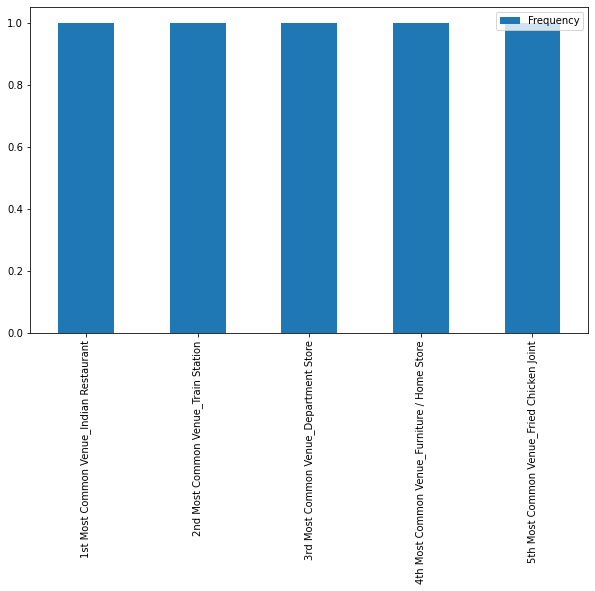

In [64]:
onehot1.plot(kind='bar', figsize=(10, 6))

In [66]:
cl1=merged.loc[merged['Cluster Labels'] == 1, merged.columns[[0] + list(range(4,9))]]

num_top_venues = 5

for hood in cl1['City']:
    print("----"+hood+"----")
    temp = grouped[grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    
cl1.reset_index(drop=True)

----Gangtok----
                 venue  freq
0                 Café   0.6
1                Plaza   0.2
2  Dumpling Restaurant   0.2
3        Jewelry Store   0.0
4   Light Rail Station   0.0


----Warangal----
                           venue  freq
0                           Café   0.5
1              Electronics Store   0.5
2  Vegetarian / Vegan Restaurant   0.0
3                    Pizza Place   0.0
4                  Jewelry Store   0.0


----Madurai----
                           venue  freq
0              Electronics Store   1.0
1  Vegetarian / Vegan Restaurant   0.0
2                           Park   0.0
3             Italian Restaurant   0.0
4                  Jewelry Store   0.0




,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Gangtok,Café,Plaza,Dumpling Restaurant,Train Station,Department Store
1,Warangal,Electronics Store,Café,Train Station,Department Store,Furniture / Home Store
2,Madurai,Electronics Store,Train Station,Hotel Bar,Furniture / Home Store,Fried Chicken Joint


<AxesSubplot:>

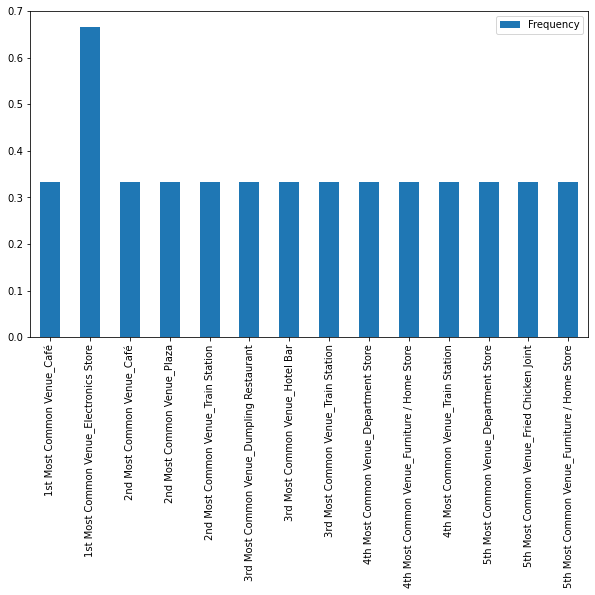

In [67]:
onehot1=pd.get_dummies(cl1, columns=['1st Most Common Venue', '2nd Most Common Venue','3rd Most Common Venue',
                            '4th Most Common Venue','5th Most Common Venue'])
onehot1=onehot1.mean()
onehot1=onehot1.to_frame()
onehot1.columns=['Frequency']
onehot1.plot(kind='bar', figsize=(10, 6))

In [68]:
cl2=merged.loc[merged['Cluster Labels'] == 2, merged.columns[[0] + list(range(4,9))]]

num_top_venues = 5

for hood in cl2['City']:
    print("----"+hood+"----")
    temp = grouped[grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    
cl2.reset_index(drop=True)

----New Delhi----
                           venue  freq
0              Indian Restaurant  0.25
1             Light Rail Station  0.25
2                    Music Venue  0.25
3                  National Park  0.25
4  Vegetarian / Vegan Restaurant  0.00


----Mumbai----
                           venue  freq
0  Vegetarian / Vegan Restaurant  0.14
1                           Café  0.14
2              Indian Restaurant  0.14
3                    Flea Market  0.14
4           Fast Food Restaurant  0.14


----Kolkata----
                           venue  freq
0                      Nightclub   1.0
1  Vegetarian / Vegan Restaurant   0.0
2              Indian Restaurant   0.0
3             Italian Restaurant   0.0
4                  Jewelry Store   0.0


----Ahmedabad----
                           venue  freq
0                           Park  0.33
1               Business Service  0.33
2                          River  0.33
3  Vegetarian / Vegan Restaurant  0.00
4             Italian Restaura

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,New Delhi,Indian Restaurant,Light Rail Station,Music Venue,National Park,Train Station
1,Mumbai,Train Station,Indian Restaurant,Asian Restaurant,Café,Fast Food Restaurant
2,Kolkata,Nightclub,Train Station,Department Store,Furniture / Home Store,Fried Chicken Joint
3,Ahmedabad,Park,River,Business Service,Currency Exchange,Fried Chicken Joint
4,Vadodara,Flea Market,Train Station,Hotel Bar,Furniture / Home Store,Fried Chicken Joint
5,Jaipur,Hotel,Indian Restaurant,Business Service,Department Store,Furniture / Home Store
6,Ranchi,Multiplex,Train Station,Department Store,Furniture / Home Store,Fried Chicken Joint
7,Kanpur,Supplement Shop,Train Station,Currency Exchange,Furniture / Home Store,Fried Chicken Joint
8,Allahabad,Furniture / Home Store,Train Station,Hotel Bar,Fried Chicken Joint,Food Court
9,Bhubaneshwar,Currency Exchange,Hotel Bar,Furniture / Home Store,Fried Chicken Joint,Food Court


<AxesSubplot:>

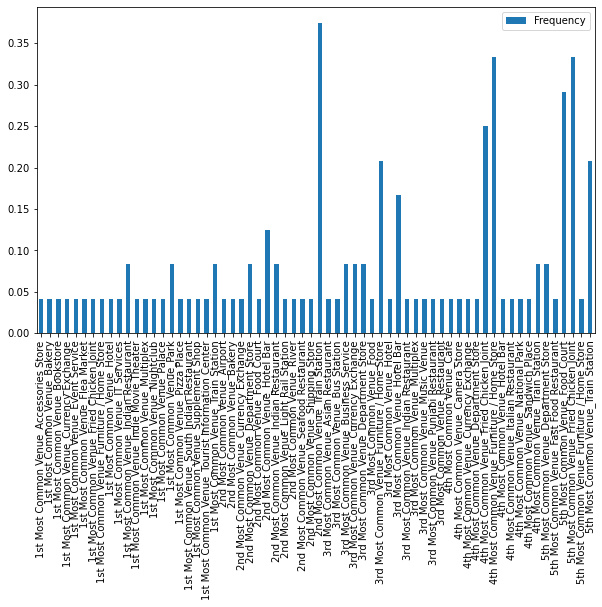

In [71]:
onehot1=pd.get_dummies(cl2, columns=['1st Most Common Venue', '2nd Most Common Venue','3rd Most Common Venue',
                            '4th Most Common Venue','5th Most Common Venue'])
onehot1=onehot1.mean()
onehot1=onehot1.to_frame()
onehot1.columns=['Frequency']
onehot1.plot(kind='bar', figsize=(10, 6))

In [72]:
cl3=merged.loc[merged['Cluster Labels'] == 3, merged.columns[[0] + list(range(4,9))]]

num_top_venues = 5

for hood in cl3['City']:
    print("----"+hood+"----")
    temp = grouped[grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    
cl3.reset_index(drop=True)

----Lucknow----
                           venue  freq
0                          Hotel   0.5
1                         Buffet   0.5
2  Vegetarian / Vegan Restaurant   0.0
3                    Pizza Place   0.0
4                  Jewelry Store   0.0


----Amritsar----
                venue  freq
0               Hotel  0.67
1         Pizza Place  0.33
2                Park  0.00
3  Italian Restaurant  0.00
4       Jewelry Store  0.00


----Lucknow----
                           venue  freq
0                          Hotel   0.5
1                         Buffet   0.5
2  Vegetarian / Vegan Restaurant   0.0
3                    Pizza Place   0.0
4                  Jewelry Store   0.0


----Ludhiana----
                           venue  freq
0                          Hotel   1.0
1  Vegetarian / Vegan Restaurant   0.0
2                           Park   0.0
3             Italian Restaurant   0.0
4                  Jewelry Store   0.0




,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Lucknow,Hotel,Buffet,Department Store,Furniture / Home Store,Fried Chicken Joint
1,Amritsar,Hotel,Pizza Place,Currency Exchange,Furniture / Home Store,Fried Chicken Joint
2,Lucknow,Hotel,Buffet,Department Store,Furniture / Home Store,Fried Chicken Joint
3,Ludhiana,Hotel,Hotel Bar,Furniture / Home Store,Fried Chicken Joint,Food Court


<AxesSubplot:>

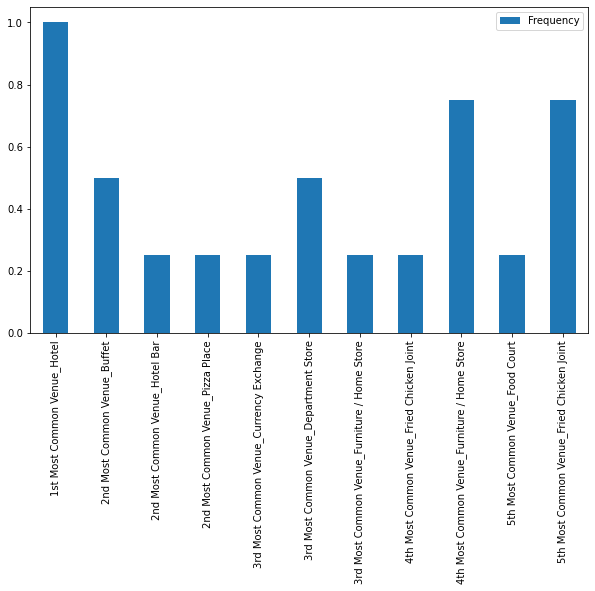

In [73]:
onehot1=pd.get_dummies(cl3, columns=['1st Most Common Venue', '2nd Most Common Venue','3rd Most Common Venue',
                            '4th Most Common Venue','5th Most Common Venue'])
onehot1=onehot1.mean()
onehot1=onehot1.to_frame()
onehot1.columns=['Frequency']
onehot1.plot(kind='bar', figsize=(10, 6))

In [74]:
cl4=merged.loc[merged['Cluster Labels'] == 4, merged.columns[[0] + list(range(4,9))]]

num_top_venues = 5

for hood in cl4['City']:
    print("----"+hood+"----")
    temp = grouped[grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    
cl4.reset_index(drop=True)

----Bhopal----
                           venue  freq
0                  Jewelry Store   0.5
1                         Market   0.5
2  Vegetarian / Vegan Restaurant   0.0
3              Indian Restaurant   0.0
4             Italian Restaurant   0.0


----Raipur----
                           venue  freq
0                  Jewelry Store   1.0
1  Vegetarian / Vegan Restaurant   0.0
2              Indian Restaurant   0.0
3             Italian Restaurant   0.0
4             Light Rail Station   0.0




,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bhopal,Jewelry Store,Market,Train Station,Department Store,Fried Chicken Joint
1,Raipur,Jewelry Store,Train Station,Department Store,Furniture / Home Store,Fried Chicken Joint


<AxesSubplot:>

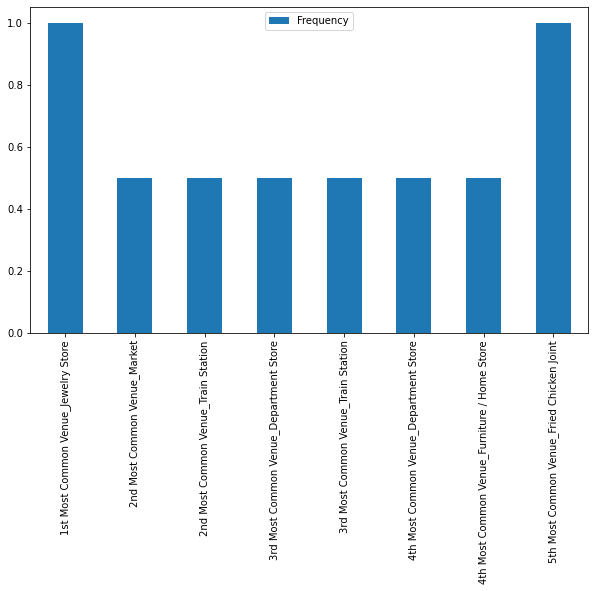

In [75]:
onehot1=pd.get_dummies(cl4, columns=['1st Most Common Venue', '2nd Most Common Venue','3rd Most Common Venue',
                            '4th Most Common Venue','5th Most Common Venue'])
onehot1=onehot1.mean()
onehot1=onehot1.to_frame()
onehot1.columns=['Frequency']
onehot1.plot(kind='bar', figsize=(10, 6))

Here we can see the similarity between the neighborhoods of cities beloging to each cluster which can be used to identify the cities based on our bus